In [1]:
install.packages('rugarch')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘xts’, ‘zoo’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘nloptr’, ‘RcppArmadillo’




In [2]:

install.packages('tseries')
install.packages('fBasics')
install.packages('zoo') #Convert to time series data type
install.packages('lmtest')
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘urca’




In [3]:
library(rugarch)
library(tseries)
library(fBasics)
library(zoo) #Convert to time series data type
library(lmtest)
library(forecast)

Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘fBasics’


The following objects are masked from ‘package:rugarch’:

    qgh, qnig



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [4]:
install.packages('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(quantmod)

Loading required package: xts

Loading required package: TTR


Attaching package: ‘TTR’


The following object is masked from ‘package:fBasics’:

    volatility




In [7]:
# Download GOOG stock data from Yahoo Finance
getSymbols("IBM", src = "yahoo", from = "2002-01-01", to = "2017-12-31")

# Check the structure of the downloaded data
head(IBM)

[1] "IBM"

           IBM.Open IBM.High  IBM.Low IBM.Close IBM.Volume IBM.Adjusted
2002-01-02 115.2964 116.1568 114.5315  116.1568    7178489     63.32119
2002-01-03 116.1568 118.7572 114.9618  118.2218    9018298     64.44688
2002-01-04 118.5946 120.0765 118.5277  120.0765    8791839     65.45795
2002-01-07 119.5029 120.6405 118.2600  118.5946    6212822     64.65016
2002-01-08 118.7859 119.6941 118.2887  119.2161    5556143     64.98888
2002-01-09 119.2161 120.8317 118.6902  119.0153    7154535     64.87945

In [8]:
ibm <- zoo(IBM$IBM.Close)

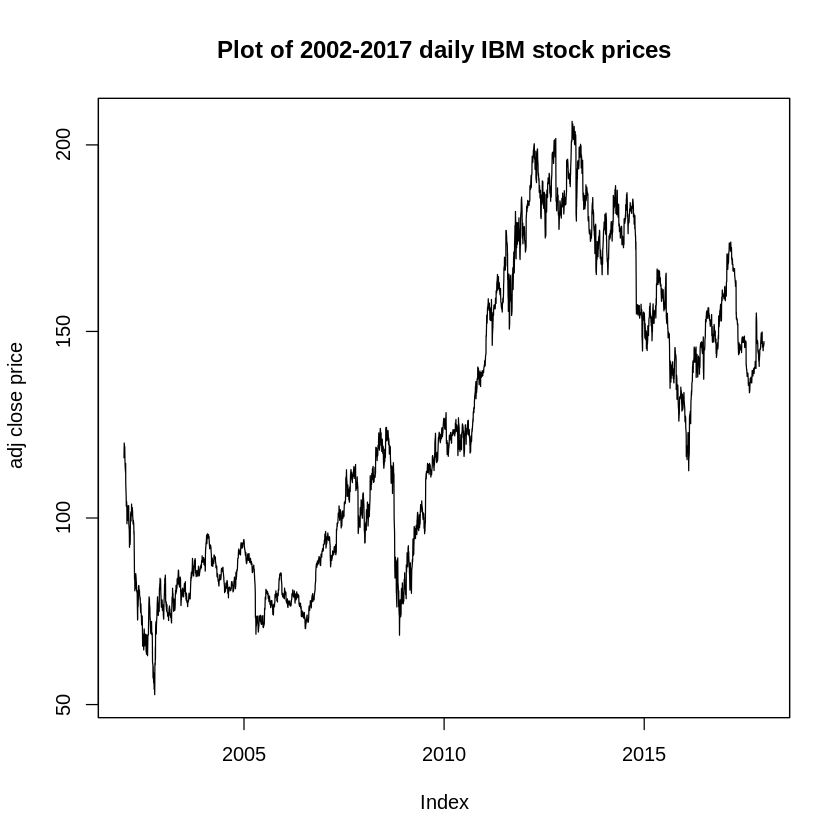

In [9]:
#Time series plot (non-stationary with varying mean and variance)
plot(ibm, type='l', ylab = " adj close price", main="Plot of 2002-2017 daily IBM stock prices")

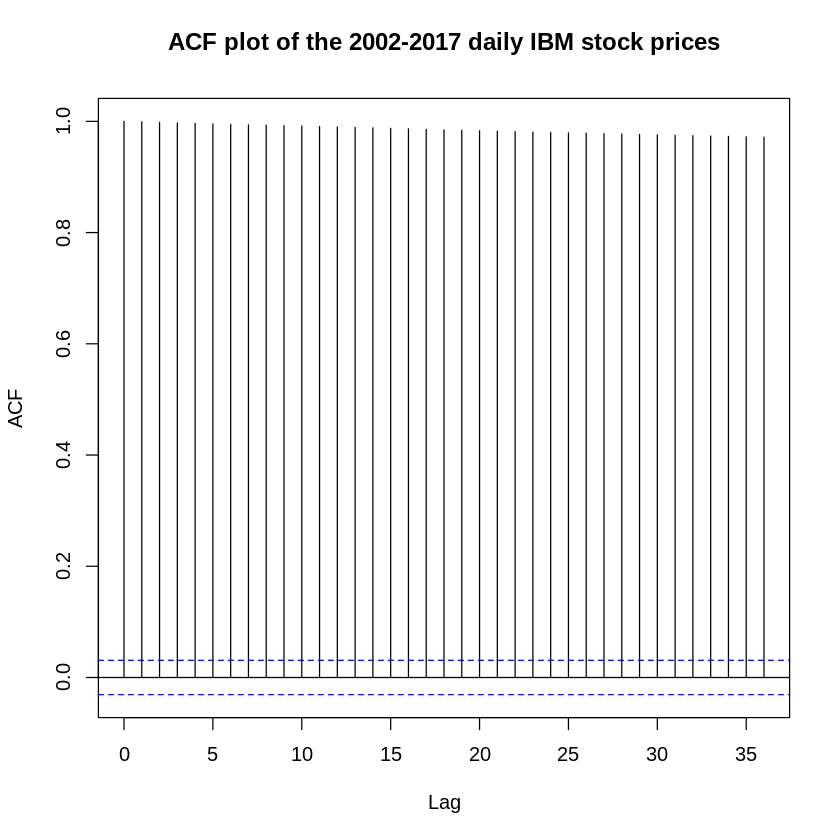

In [10]:
acf(coredata(ibm), main="ACF plot of the 2002-2017 daily IBM stock prices")

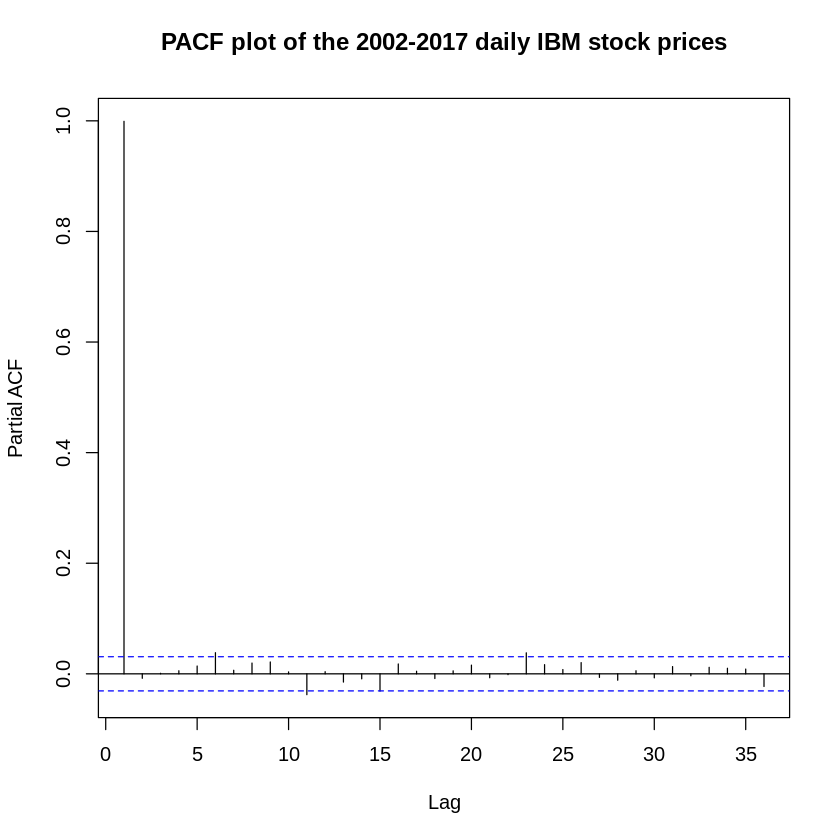

In [11]:
pacf(coredata(ibm), main="PACF plot of the 2002-2017 daily IBM stock prices")

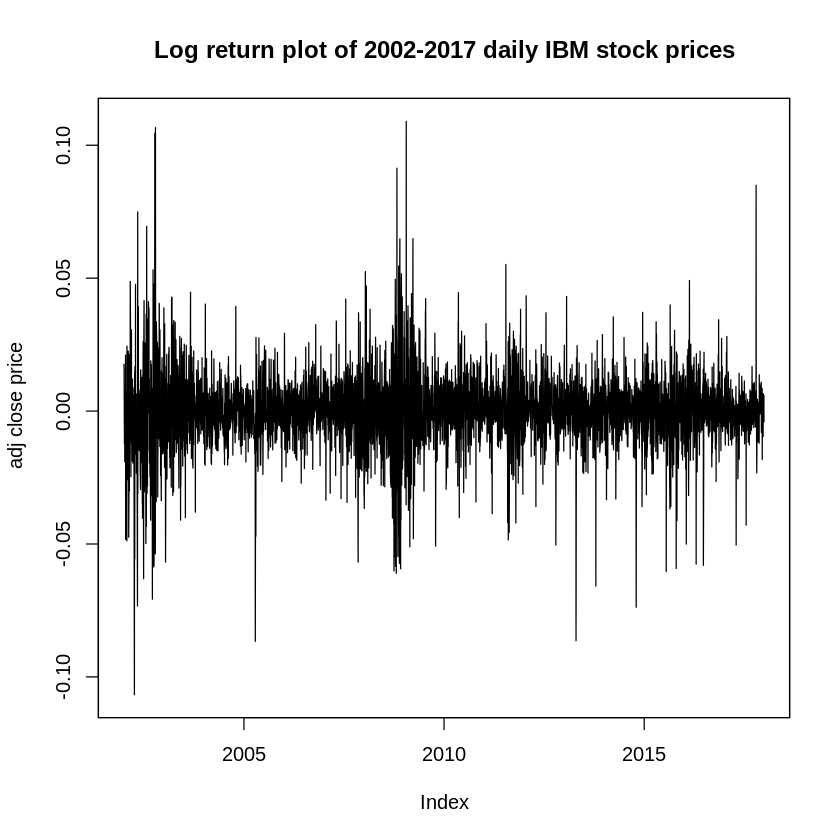

In [12]:
#log and One-Time Differencing Transformation
#To attain stationarity: log return time series

ibm_rets <- log(ibm/lag(ibm,-1))
plot(ibm_rets, type='l', ylab = " adj close price", main="Log return plot of 2002-2017 daily IBM stock prices")

In [13]:
#Augmented Dickey Fuller (ADF) Test
adf.test(ibm) #Original
adf.test(ibm_rets) #Log-return


	Augmented Dickey-Fuller Test

data:  ibm
Dickey-Fuller = -2.1559, Lag order = 15, p-value = 0.5123
alternative hypothesis: stationary


Warning message in adf.test(ibm_rets):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ibm_rets
Dickey-Fuller = -15.731, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


In [14]:
#strip off the dates and create numeric object
ibm_ret_num <- coredata(ibm_rets)

In [15]:
install.packages('FinTS')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
#Autoregressive Conditional Heteroskedasticity (ARCH) Test
library(zoo)
library(FinTS)


Attaching package: ‘FinTS’


The following object is masked _by_ ‘.GlobalEnv’:

    ibm


The following object is masked from ‘package:forecast’:

    Acf




In [17]:
ArchTest(ibm_ret_num,lag=12)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  ibm_ret_num
Chi-squared = 442.25, df = 12, p-value < 2.2e-16


In [18]:
#the log return of time series data has ARCH effect and therefore GARCH model can be fitted.
#Exploratory Analysis
#Compute statistics
basicStats(ibm_rets) #mean is 0 and the distribution of log returns has large heavy tail

,IBM.Close
,<dbl>
nobs,4027.000000
NAs,0.000000
Minimum,-0.106675
Maximum,0.108989
1. Quartile,-0.006641
3. Quartile,0.007050
Mean,0.000058
Median,0.000108
Sum,0.233265


[1] 6.944574
attr(,"method")
[1] "excess"

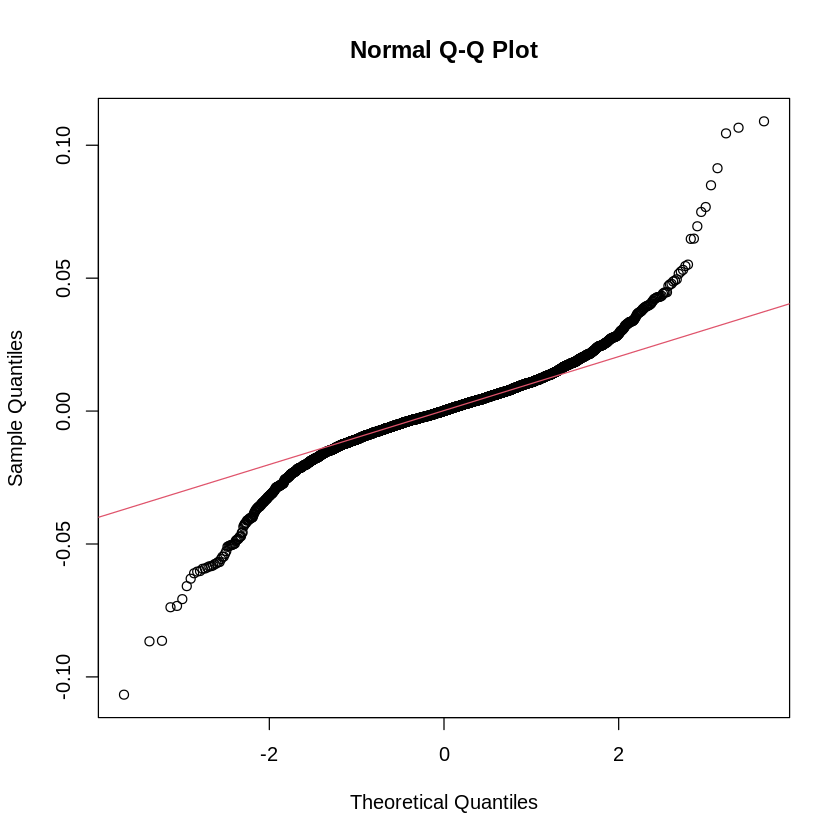

In [19]:
#QQ-plot
qqnorm(ibm_rets)
qqline(ibm_rets, col = 2)
kurtosis(ibm_rets) #positive, heavy-tailed distribution

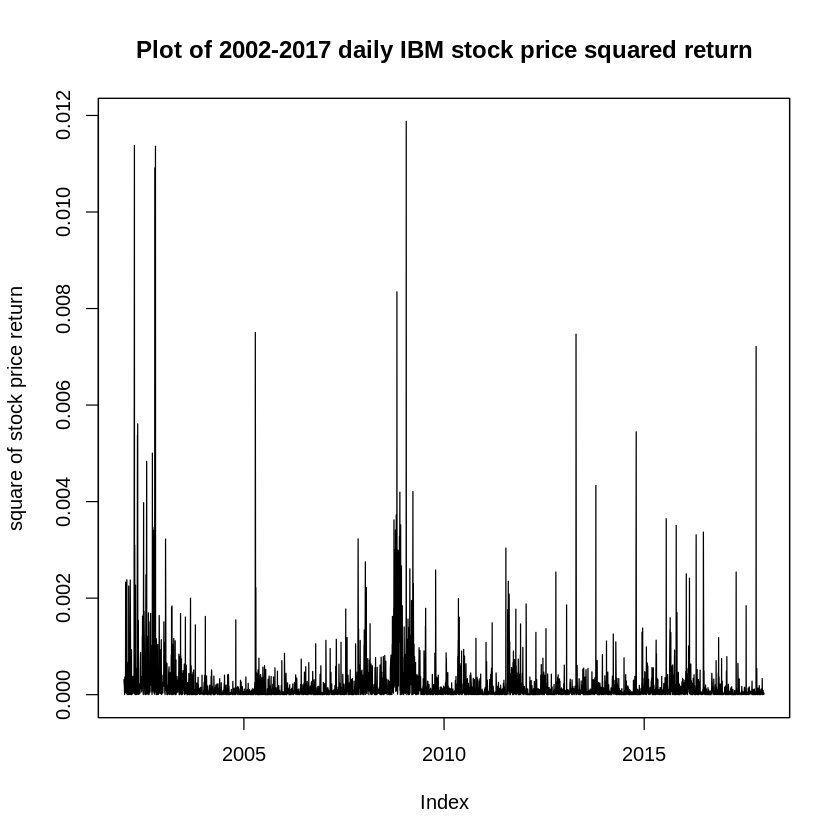

In [20]:
#Time plot of square of log return of prices
# mean is constant and nearly 0
plot(ibm_rets^2,type='l', ylab = "square of stock price return", main="Plot of 2002-2017 daily IBM stock price squared return")

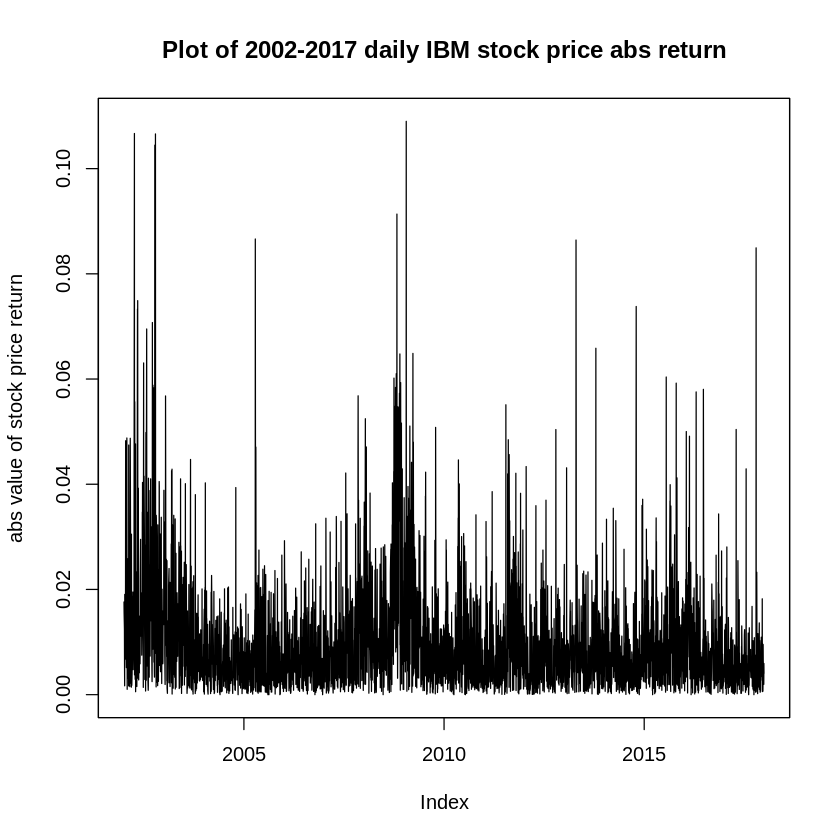

In [21]:
#Time plot of absolute value of log return of prices
plot(abs(ibm_rets),type='l', ylab = "abs value of stock price return", main="Plot of 2002-2017 daily IBM stock price abs return")

null device 
          1

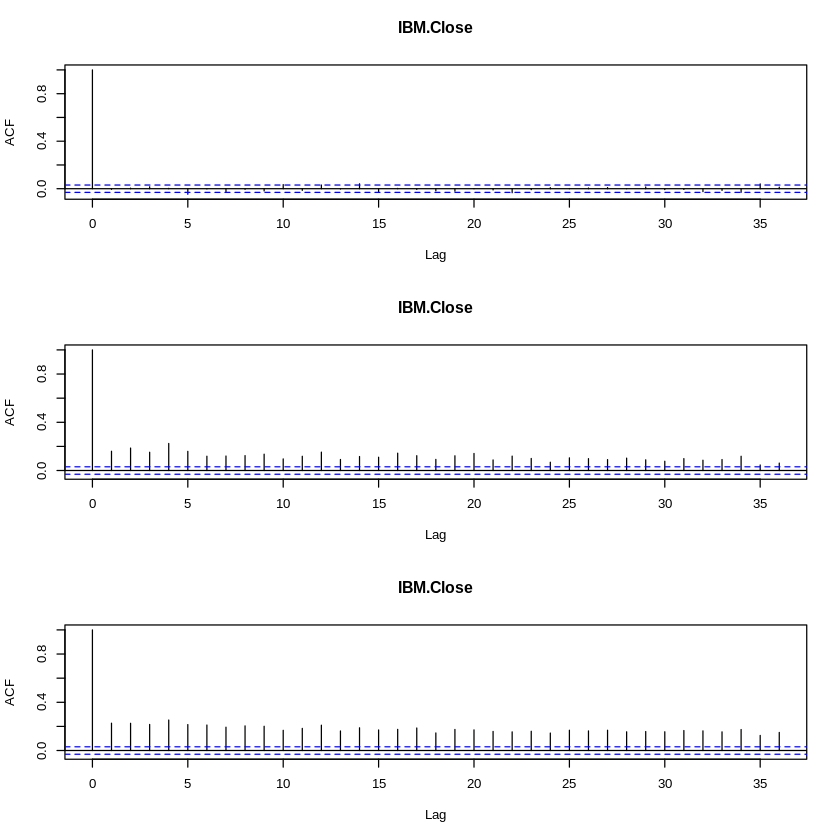

In [23]:
par(mfrow=c(3,1)) #show three plots in a figure
acf(ibm_ret_num) #non-linear dependence
acf(ibm_ret_num^2) #strong non-linear dependence
acf(abs(ibm_ret_num)) #strong non-linear dependence
dev.off()

In [25]:
# Install the tseries package if it is not already installed
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(tseries)
library(FinTS)

In [37]:
install.packages('TSA')
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:fBasics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [38]:
eacf(ibm_ret_num) #
eacf(abs(ibm_ret_num)) #suggest garch 11

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o x o o o o x o  o  o  x 
1 x o o o x o o o o o o  o  o  o 
2 x x o o x o o o o o o  o  o  x 
3 x x x o x o o o o o o  o  o  x 
4 x x x o x o o o o o o  o  o  o 
5 x x o x x o o o o o o  o  o  o 
6 x x x o x x o o o o o  o  o  o 
7 x x x o x x x o o o o  o  o  o 
AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x x x  x  x  x 
1 x o o x o o o o o o o  x  x  o 
2 x x o x o o o o o o o  x  o  o 
3 x x x x o o o o o o o  x  o  o 
4 x x o x o o o o o o o  o  o  o 
5 x x o x x o o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x x x x o x o o o o o  o  o  o 


In [40]:
#garch 11
g11=garch(ibm_ret_num,order=c(1,1))
g11


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.878685e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -1.515e+04
     1    7 -1.515e+04  3.73e-04  5.21e-04  1.0e-04  7.9e+10  1.0e-05  2.06e+07
     2    8 -1.515e+04  6.23e-05  7.48e-05  7.2e-05  2.0e+00  1.0e-05  7.73e+01
     3    9 -1.515e+04  3.29e-06  3.46e-06  9.9e-05  2.0e+00  1.0e-05  7.66e+01
     4   17 -1.525e+04  6.13e-03  1.07e-02  5.2e-01  2.0e+00  1.1e-01  7.61e+01
     5   20 -1.538e+04  8.49e-03  8.92e-03  7.3e-01  2.0e+00  3.3e-01  5.09e+00
     6   22 -1.538e+04  2.17e-04  7.58e-03  1.4e-01  2.0e+00  1.3e-01  7.24e+00
     7   23 -1.548e+04  6.09e-03  5.04e-03  5.8e-02  2.0e+00  6.4e-02  1.73e+00
     8   24 -1.549e+04  1.22e-03  1.40e-03  5.2e-02  2.0e+00  6.4e-02  1.10e+00
     9   26 -1.549e+04  1.74e-06  7.90e-05  4.9e-03 


Call:
garch(x = ibm_ret_num, order = c(1, 1))

Coefficient(s):
       a0         a1         b1  
1.208e-05  1.212e-01  8.191e-01  


In [41]:
summary(g11) #checking p value


Call:
garch(x = ibm_ret_num, order = c(1, 1))

Model:
GARCH(1,1)

Residuals:
      Min        1Q    Median        3Q       Max 
-7.451257 -0.532156  0.007358  0.562905  9.628483 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 1.208e-05   8.144e-07    14.83   <2e-16 ***
a1 1.212e-01   6.823e-03    17.76   <2e-16 ***
b1 8.191e-01   1.009e-02    81.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 7772.4, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.20939, df = 1, p-value = 0.6472


In [42]:
AIC(g11)

[1] -23627.05

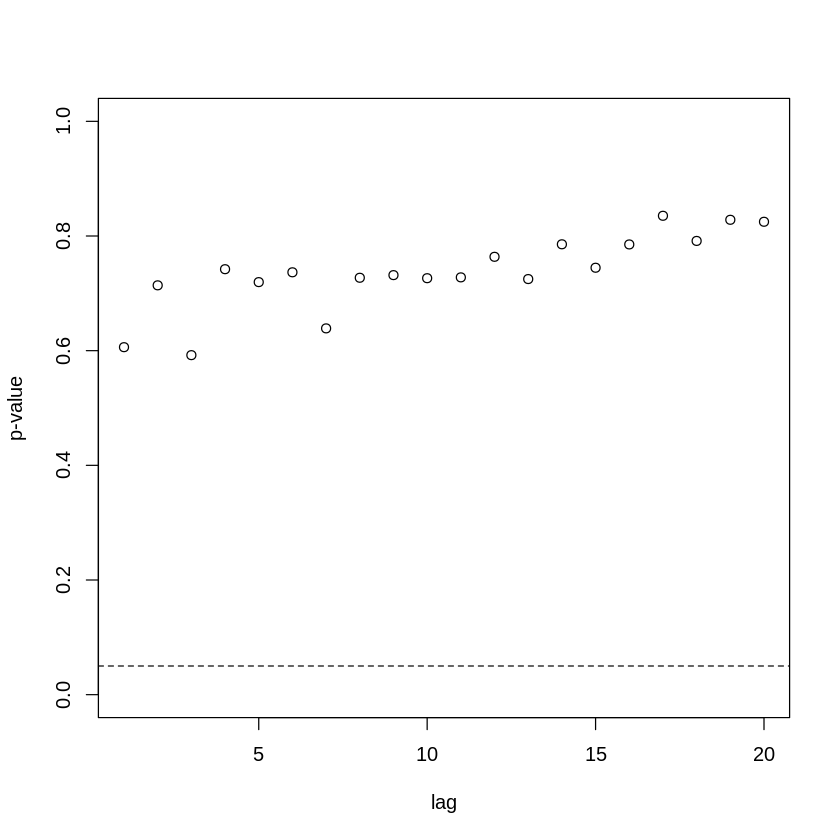

In [43]:
gBox(g11,method='squared')

In [52]:
#garch 12
g12=garch(ibm_ret_num,order=c(1,2))
summary(g12)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.774314e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -1.521e+04
     1    7 -1.523e+04  7.60e-04  9.48e-04  1.2e-04  1.0e+11  1.2e-05  4.96e+07
     2    8 -1.523e+04  3.09e-04  3.58e-04  1.2e-04  2.4e+00  1.2e-05  9.07e+01
     3    9 -1.523e+04  2.54e-06  2.78e-06  9.1e-05  2.0e+00  1.2e-05  8.77e+01
     4   17 -1.533e+04  6.73e-03  1.22e-02  4.7e-01  2.0e+00  1.1e-01  8.69e+01
     5   18 -1.537e+04  2.56e-03  2.67e-03  4.2e-01  2.0e+00  1.1e-01  1.61e+00
     6   21 -1.547e+04  6.15e-03  7.75e-03  5.7e-01  2.0e+00  4.6e-01  3.28e+00
     7   30 -1.548e+04  7.50e-04  4.97e-03  9.2e-06  4.5e+00  1.2e-05  7.32e-01
     8   31 -1.549e+04  5.81e-04  4.14e-04  6.1e-06  2.0e+00  1.2e-05  2.55e-02
     9   32 -1


Call:
garch(x = ibm_ret_num, order = c(1, 2))

Model:
GARCH(1,2)

Residuals:
      Min        1Q    Median        3Q       Max 
-6.983527 -0.530727  0.006989  0.555239  9.706917 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 1.944e-05   1.455e-06    13.37   <2e-16 ***
a1 2.093e-01   1.391e-02    15.04   <2e-16 ***
a2 2.783e-11   1.999e-02     0.00        1    
b1 7.135e-01   1.882e-02    37.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 7232, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 1.5544, df = 1, p-value = 0.2125


[1] -23599.17

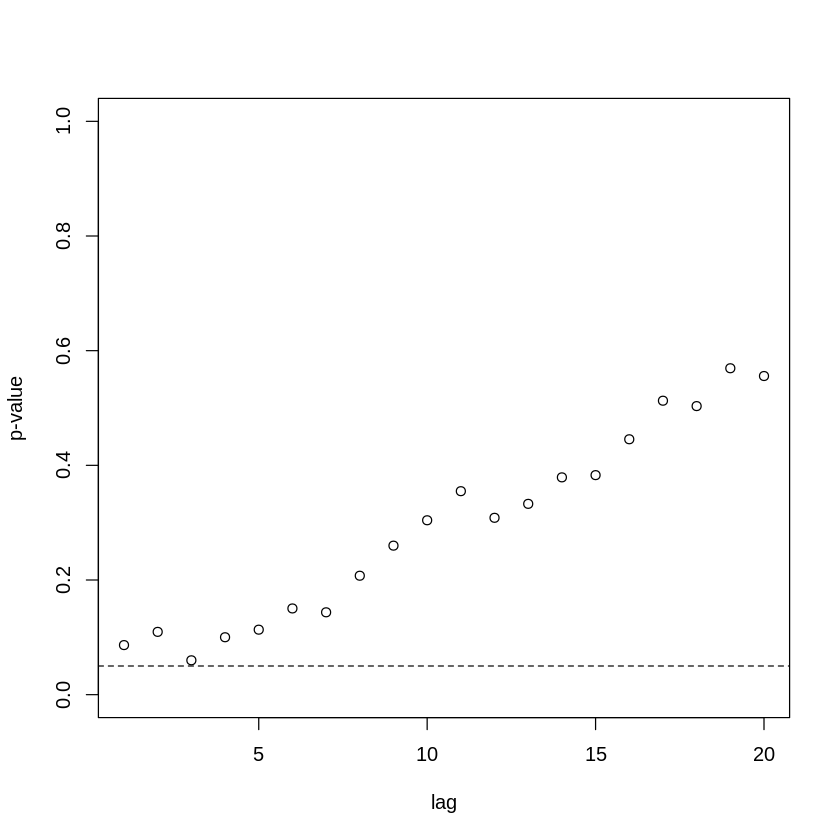

In [51]:
AIC(g12)
gBox(g12,method='squared') #not good model conduct diagonise checking

***Further Models Identification***

In [53]:
#---1. GARCH(1,1) with normally distributed errors
garch11.spec=ugarchspec(variance.model=list(garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)))
#estimate model
garch11.fit=ugarchfit(spec=garch11.spec, data=ibm_rets)
garch11.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000299    0.000183   1.6357  0.10191
omega   0.000012    0.000000  50.3804  0.00000
alpha1  0.121681    0.006198  19.6323  0.00000
beta1   0.818924    0.008385  97.6628  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000299    0.000201   1.4878  0.13679
omega   0.000012    0.000001  22.8426  0.00000
alpha1  0.121681    0.012010  10.1318  0.00000
beta1   0.818924    0.018521  44.2166  0.00000

LogLikelihood : 11820.43 

Information Criteria
------------------------------------
                    
Akaike       -5.8686
Bayes        -5.8623
Shibata      -5.8686
Hannan-Quinn -5.8664

Weig

In [54]:
#---2. GARCH(1,1) model with t-distribution
garch11.t.spec=ugarchspec(variance.model=list(garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model = "std")
#estimate model
garch11.t.fit=ugarchfit(spec=garch11.t.spec, data=ibm_rets)
garch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000239    0.000160   1.5010 0.133359
omega   0.000002    0.000001   3.2868 0.001013
alpha1  0.053994    0.006074   8.8888 0.000000
beta1   0.935235    0.007126 131.2475 0.000000
shape   4.638029    0.314835  14.7316 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000239    0.000153   1.5666 0.117216
omega   0.000002    0.000002   1.2944 0.195528
alpha1  0.053994    0.021457   2.5164 0.011857
beta1   0.935235    0.023022  40.6241 0.000000
shape   4.638029    0.387297  11.9754 0.000000

LogLikelihood : 12110.03 

Information Criteria
------------------------------------
                 

In [55]:
#---3. GARCH(1,1) model with skewed t-distribution
garch11.skt.spec=ugarchspec(variance.model=list(garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model = "sstd")
#estimate model
garch11.skt.fit=ugarchfit(spec=garch11.skt.spec, data=ibm_rets)
garch11.skt.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000190    0.000175   1.0842 0.278283
omega   0.000002    0.000001   3.3428 0.000829
alpha1  0.054202    0.006024   8.9974 0.000000
beta1   0.935129    0.007034 132.9481 0.000000
skew    0.982194    0.022324  43.9978 0.000000
shape   4.653540    0.317972  14.6351 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000190    0.000178   1.0702 0.284549
omega   0.000002    0.000002   1.3436 0.179090
alpha1  0.054202    0.020947   2.5876 0.009665
beta1   0.935129    0.022364  41.8138 0.000000
skew    0.982194    0.024278  40.4569 0.000000
shape   4.653540    0.395036  11.7800 0.000000

LogLike

In [56]:
#---4. eGARCH(1,1) model with t-distribution
egarch11.t.spec=ugarchspec(variance.model=list(model = "eGARCH", garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)), distribution.model = "std")
#estimate model
egarch11.t.fit=ugarchfit(spec=egarch11.t.spec, data=ibm_rets)
egarch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000136    0.000157    0.86623  0.38637
omega  -0.077051    0.004955  -15.55142  0.00000
alpha1 -0.050635    0.008601   -5.88729  0.00000
beta1   0.991408    0.000569 1741.47587  0.00000
gamma1  0.111317    0.019911    5.59080  0.00000
shape   4.821586    0.370799   13.00322  0.00000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000136    0.000154    0.88604 0.375596
omega  -0.077051    0.006005  -12.83146 0.000000
alpha1 -0.050635    0.009686   -5.22765 0.000000
beta1   0.991408    0.000747 1326.49421 0.000000
gamma1  0.111317    0.034275    3.24777 0.001163
shape   4.821586    0.480039  

In [57]:
#---5. fGARCH(1,1) model with t-distribution
fgarch11.t.spec=ugarchspec(variance.model=list(model = "fGARCH", garchOrder=c(1,1), submodel = "APARCH"), mean.model=list(armaOrder=c(0,0)), distribution.model = "std")
#estimate model
fgarch11.t.fit=ugarchfit(spec=fgarch11.t.spec, data=ibm_rets)
fgarch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: APARCH
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000090    0.000138  0.65183 0.514510
omega   0.000546    0.000290  1.88200 0.059836
alpha1  0.080201    0.016816  4.76924 0.000002
beta1   0.925322    0.018779 49.27369 0.000000
eta11   0.506945    0.030921 16.39465 0.000000
lambda  0.783056    0.027288 28.69640 0.000000
shape   4.930130    0.349117 14.12172 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000090    0.000119  0.75611 0.449582
omega   0.000546    0.000271  2.01629 0.043770
alpha1  0.080201    0.044668  1.79549 0.072575
beta1   0.925322    0.048482 19.08600 0.000000
eta11   0.506945    0.220224  

In [58]:
#---6. iGARCH (1,1) Model with Normal Distribution
igarch11.t.spec=ugarchspec(variance.model=list(model = "iGARCH", garchOrder=c(1,1)), mean.model=list(armaOrder=c(0 , 0 )), distribution.model = "std")
igarch11.t.fit=ugarchfit(spec=igarch11.t.spec, data=ibm_rets)
igarch11.t.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000233    0.000159   1.4607 0.144091
omega   0.000001    0.000001   2.0438 0.040975
alpha1  0.054148    0.005121  10.5742 0.000000
beta1   0.945852          NA       NA       NA
shape   4.231659    0.216776  19.5209 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000233    0.000160   1.4504 0.146936
omega   0.000001    0.000001   1.0540 0.291873
alpha1  0.054148    0.016458   3.2900 0.001002
beta1   0.945852          NA       NA       NA
shape   4.231659    0.232057  18.2354 0.000000

LogLikelihood : 12106.82 

Information Criteria
------------------------------------
                 

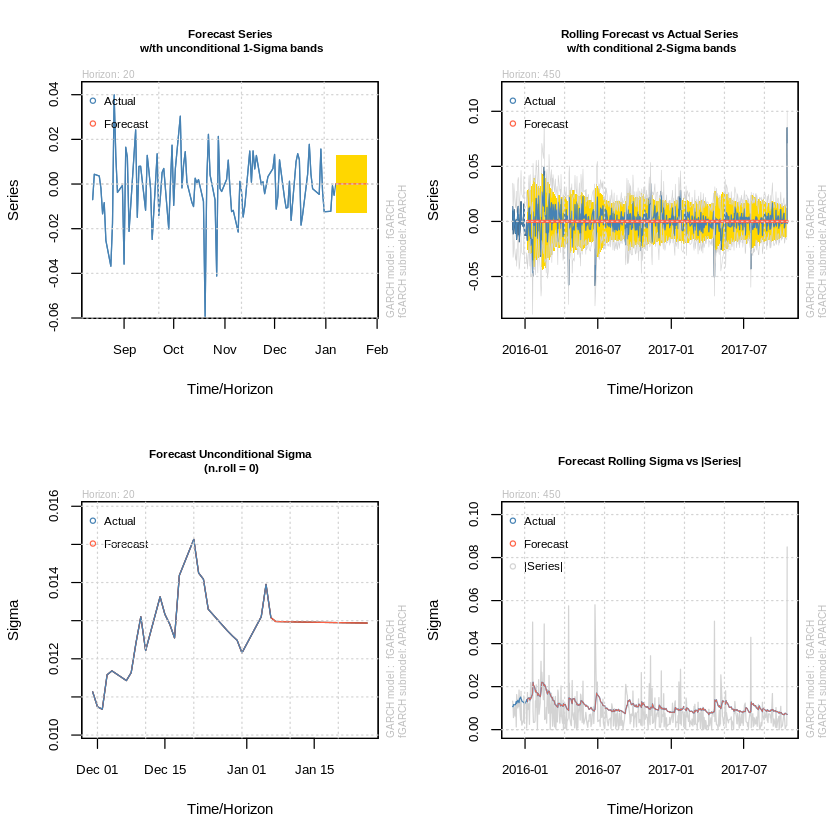

In [60]:
# Step 3: Forecasting
# Set up the model for out-of-sample forecasting
rff = ugarchfit(spec = fgarch11.t.spec, data = ibm_rets, out.sample = 500)

# Forecast 20 steps ahead, rolling the forecast 450 times
rf = ugarchforecast(rff, n.ahead = 20, n.roll = 450)

# Step 4: Plot the forecast results
plot(rf, which = "all")